In [1]:
import numpy as np, pandas as pd, seaborn as sns,matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df=pd.read_csv('./advertising.csv')
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [7]:
df.drop(['Ad Topic Line','City','Timestamp','Country'],axis=1,inplace=True)
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
0                     68.95   35     61833.90                256.09     0   
1                     80.23   31     68441.85                193.77     1   
2                     69.47   26     59785.94                236.50     0   
3                     74.15   29     54806.18                245.89     1   
4                     68.37   35     73889.99                225.58     0   

   Clicked on Ad  
0              0  
1              0  
2              0  
3              0  
4              0

<AxesSubplot:xlabel='Age', ylabel='Count'>

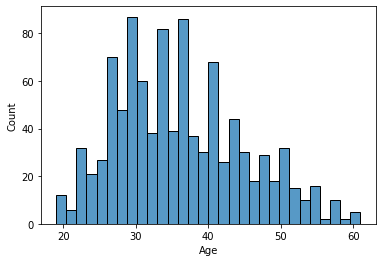

In [8]:
sns.histplot(x='Age',bins=30,data=df)

## EXPLORATORY DATA ANALYSIS
### ANALYSING REALTION BETWEEN VARIABLES


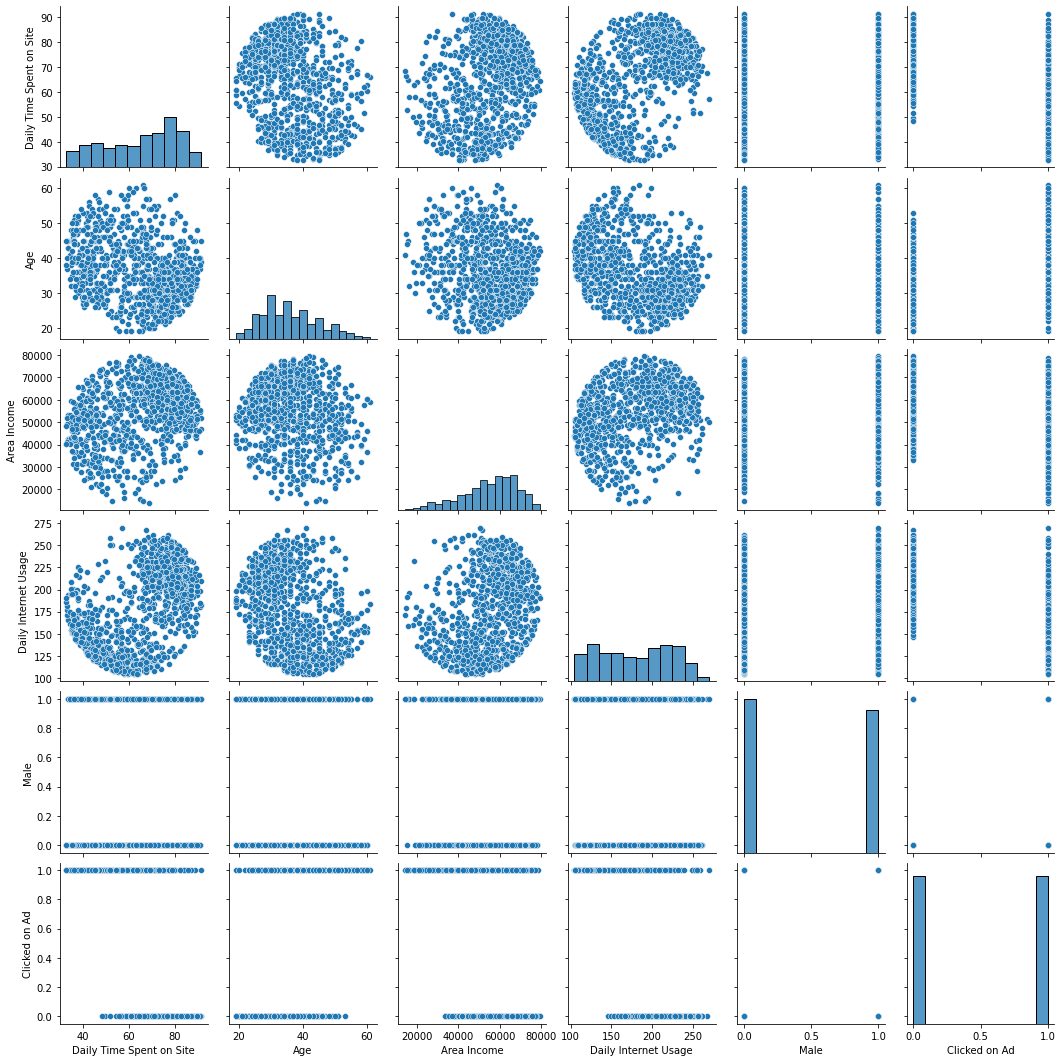

In [9]:
sns.pairplot(df)

### DRAWING RELATIONS FROM THE ABOVE DATA

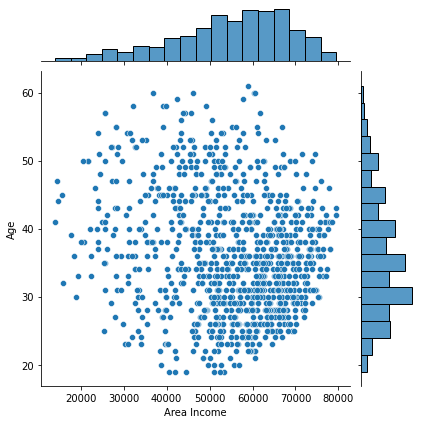

In [12]:
sns.jointplot(x='Area Income',y='Age',data=df)

In [13]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df)

## LOGISTIC REGRESSION

In [4]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
x=df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]
y=df['Clicked on Ad']

### TEST TRAIN SPLIT

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)


In [6]:
model.fit(x_train,y_train)

LogisticRegression()

### DRAWING PREDICTIONS FROM THE MODEL

In [8]:
prediction=model.predict(x_test)
print(prediction)

[1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0
 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1
 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0
 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0
 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0
 1 0 1 0]


### CLASSIFICATION REPORT

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[149   8]
 [ 14 129]]


In [23]:
print(model.score(x_test,y_test)*100)

92.66666666666666
